Use-case : 
    -> Not to lose a potential customer.
    -> In this case have to focus on increasing the Recall rate means reducing False Negative.
    -> False Negative also called Type2 error defined as the customer will churn but the model will think he/she is not churn.
    -> So the priority for this customer will be less because the model thinks he/she will retain.
    -> False positive(type1 error) - the customer will not churn but the model will think he/she will churn. This will be solved by further contacting the customer.
    -> But the Recall is important here we will think churn customer as retaining one so we may not focus on them much.
    -> Since the ultimate goal is to find the churn customer and make them retain.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
dfx = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
dfx.shape

(7043, 21)

In [5]:
df = dfx.drop_duplicates()
df.shape

(7043, 21)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df["Churn"] = df["Churn"].replace(("Yes","No"),(1,0))

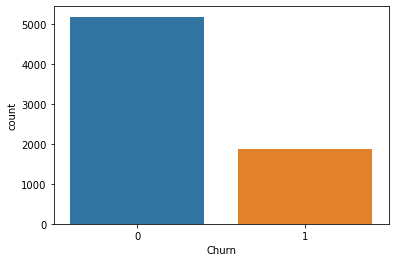

In [10]:
target = df["Churn"]
import seaborn as sns
sns.countplot(target)

In [11]:
print((target[target == 1].value_counts()))
print((target[target == 0].value_counts()))

1    1869
Name: Churn, dtype: int64
0    5174
Name: Churn, dtype: int64


In [12]:
df["customerID"].nunique()

7043

In [13]:
df = df.drop(["customerID","Churn"],axis=1)

In [14]:
df_num = [col for col in df.columns if df[col].dtype != 'object']
df_num = df[df_num]

In [15]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [16]:
df_cat = df.drop(df_num.columns,axis=1)

In [17]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65


In [18]:
for col in df_cat.columns:
    if col != 'TotalCharges':
        print(col, ":", df_cat[col].value_counts())
        print("\n")

gender : Male      3555
Female    3488
Name: gender, dtype: int64


Partner : No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents : No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService : Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines : No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService : Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity : No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup : No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


DeviceProtection : No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


TechSupport : No                     3473
Yes                    20

In [19]:
df[df["TotalCharges"]== " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,


In [20]:
df_num["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_cat = df_cat.drop("TotalCharges",axis=1)

In [21]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 595.1 KB


In [22]:
#df_num["TotalCharges"] = df_num["TotalCharges"].fillna(df_num["TotalCharges"].median())
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputer_array = imputer.fit_transform(df_num)
df_num = pd.DataFrame(imputer_array, columns  = df_num.columns)

In [23]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65


In [24]:
def tenure_bin(df_num) :
    if df_num["tenure"] <= 12 :
        return "Tenure_0-12"
    elif df_num["tenure"] > 12 and df_num["tenure"] <= 24:
        return "Tenure_12-24"
    elif df_num["tenure"] > 24 and df_num["tenure"] <= 36 :
        return "Tenure_24-36"
    elif df_num["tenure"] > 36 and df_num["tenure"] <= 48 :
        return "Tenure_36-48"
    elif df_num["tenure"] > 48 and df_num["tenure"] <= 60 :
        return "Tenure_48-60"
    elif df_num["tenure"] > 60 :
        return "Tenure_gt_60"
df_num["tenure_bin"] = df_num.apply(lambda df_num:tenure_bin(df_num),
                                      axis = 1)

In [25]:
df_num["y"] = target

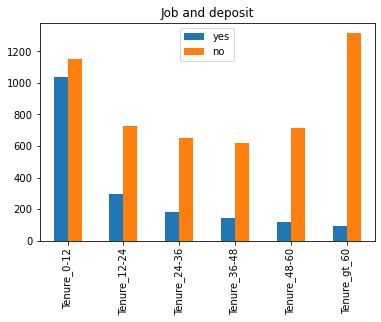

In [26]:
j_df = pd.DataFrame()

j_df['yes'] = df_num[df_num['y'] == 1]['tenure_bin'].value_counts()
j_df['no'] = df_num[df_num['y'] == 0]['tenure_bin'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

In [27]:
df_num["tenure_bin"] = df_num["tenure_bin"].replace(["Tenure_0-12","Tenure_12-24",
                                                     "Tenure_24-36","Tenure_36-48","Tenure_48-60","Tenure_gt_60"],[5,4,3,2,1,0])

In [28]:
del df_num["tenure"]
del df_num["y"]

In [29]:
df_num.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,tenure_bin
0,0.0,29.85,29.85,5
1,0.0,56.95,1889.50,3
2,0.0,53.85,108.15,5
3,0.0,42.30,1840.75,2
4,0.0,70.70,151.65,5


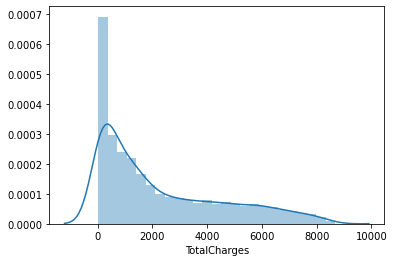

In [30]:
sns.distplot(df_num["TotalCharges"])

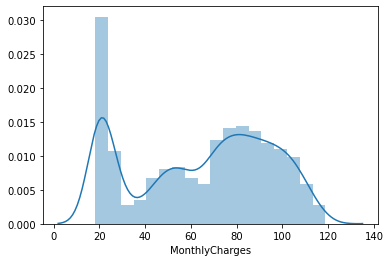

In [31]:
sns.distplot(df_num["MonthlyCharges"])

In [32]:
#sns.pairplot(df,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="y")

In [33]:
df_cat = df_cat.replace(["No internet service","No phone service"],'No')

In [34]:
label=[]
for col in df_cat.columns:
    if df_cat[col].nunique() > 2:
        label.append(col)

In [35]:
label

['InternetService', 'Contract', 'PaymentMethod']

In [36]:
df_dum = df_cat.drop(label,axis=1)
df_dum = df_dum.replace(["Yes","No"],[1,0])
df_dum = df_dum.replace(["Female","Male"],[0,1])
df_dum.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,0,0,1,0,1,0,1,0,0,0,0
2,1,0,0,1,0,1,1,0,0,0,0,1
3,1,0,0,0,0,1,0,1,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1


In [37]:
df_la = df_cat[label]
df_la.head()

,InternetService,Contract,PaymentMethod
0,DSL,Month-to-month,Electronic check
1,DSL,One year,Mailed check
2,DSL,Month-to-month,Mailed check
3,DSL,One year,Bank transfer (automatic)
4,Fiber optic,Month-to-month,Electronic check


In [38]:
df_la["InternetService"] = df_la["InternetService"].replace(["Fiber optic","DSL","No"],[2,1,0])
df_la["Contract"] = df_la["Contract"].replace(["Month-to-month","One year","Two year"],[2,1,0])
df_la["PaymentMethod"] = df_la["PaymentMethod"].replace(["Electronic check",
                                                       "Mailed check","Bank transfer (automatic)",
                                                      "Credit card (automatic)"],[3,2,1,0])
df_la.head()

,InternetService,Contract,PaymentMethod
0,1,2,3
1,1,1,2
2,1,2,2
3,1,1,1
4,2,2,3


In [39]:
# Label encoder order is alphabetical
#from sklearn.preprocessing import LabelEncoder
#labelencoder_X = LabelEncoder()
#df_l = pd.DataFrame()
#for var in df_cat.columns:
 #   df_l[var]= labelencoder_X.fit_transform(df_cat[var]) 

In [40]:
final = pd.concat([df_num,df_la,df_dum],axis=1)

In [41]:
print(final.shape,final.columns)

(7043, 19) Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'tenure_bin',
       'InternetService', 'Contract', 'PaymentMethod', 'gender', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling'],
      dtype='object')


In [42]:
final.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,tenure_bin,InternetService,Contract,PaymentMethod,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0.0,29.85,29.85,5,1,2,3,0,1,0,0,0,0,1,0,0,0,0,1
1,0.0,56.95,1889.50,3,1,1,2,1,0,0,1,0,1,0,1,0,0,0,0
2,0.0,53.85,108.15,5,1,2,2,1,0,0,1,0,1,1,0,0,0,0,1
3,0.0,42.30,1840.75,2,1,1,1,1,0,0,0,0,1,0,1,1,0,0,0
4,0.0,70.70,151.65,5,2,2,3,0,0,0,1,0,0,0,0,0,0,0,1


In [43]:
#del final["Partner"]
#del final["Dependents"]
#del final["OnlineSecurity"]
#del final["OnlineBackup"]
#del final["DeviceProtection"]

In [44]:
final.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,tenure_bin,InternetService,Contract,PaymentMethod,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0.0,29.85,29.85,5,1,2,3,0,1,0,0,0,0,1,0,0,0,0,1
1,0.0,56.95,1889.50,3,1,1,2,1,0,0,1,0,1,0,1,0,0,0,0
2,0.0,53.85,108.15,5,1,2,2,1,0,0,1,0,1,1,0,0,0,0,1
3,0.0,42.30,1840.75,2,1,1,1,1,0,0,0,0,1,0,1,1,0,0,0
4,0.0,70.70,151.65,5,2,2,3,0,0,0,1,0,0,0,0,0,0,0,1


In [45]:
#final["churn1"] = target

In [46]:
#plt.figure(figsize=(15,8))
#final.corr()['churn1'].sort_values(ascending = False).plot(kind='bar')

In [47]:
print(final.shape,len(target))

(7043, 19) 7043


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, target, test_size = 0.30, random_state = 101)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,GridSearchCV,StratifiedKFold,RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [50]:
def metrics(y,yhat):
    print(f"Precision Score: {precision_score(y,yhat) * 100:.2f}%")
    print(f"Recall Score: {recall_score(y,yhat) * 100:.2f}%")
    print(f"F1 score: {f1_score(y,yhat) * 100:.2f}%")

In [51]:
def plot_confusion(actual,pred):
    conf_matrix = confusion_matrix(actual, pred)
    f, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.title("Confusion Matrix", fontsize=20)
    plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
    ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
    ax.set_xticklabels(['0', '1'], fontsize=16, rotation=360)
    ax.set_yticklabels(['0', '1'], fontsize=16, rotation=360)
    plt.show()

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1546
           1       0.52      0.77      0.62       567

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

Precision Score: 51.83%
Recall Score: 77.43%
F1 score: 62.09%


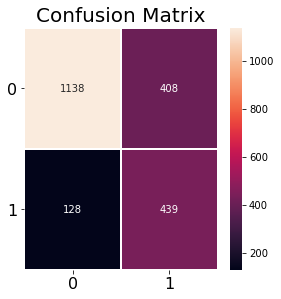

In [52]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
lrprd = lr.predict(X_test)
print(classification_report(y_test,lrprd))
metrics(y_test,lrprd)
plot_confusion(y_test,lrprd)

In [53]:
#data['Churn'] = data['Churn'].map(lambda s :1  if s =='Yes' else 0)

              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1546
           1       0.56      0.69      0.62       567

    accuracy                           0.77      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.79      0.77      0.78      2113

Precision Score: 55.57%
Recall Score: 69.49%
F1 score: 61.76%


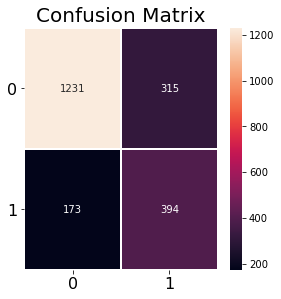

In [54]:
#learning_rate=0.032,max_depth=4,n_estimators=100,
lgb = LGBMClassifier(class_weight={0:0.21,1:0.79},learning_rate=0.13099999999999,max_depth=18,n_estimators=250)
lgb.fit(X_train, y_train)
lgbprd = lgb.predict(X_test)
print(classification_report(y_test,lgbprd))
metrics(y_test,lgbprd)
plot_confusion(y_test,lgbprd)

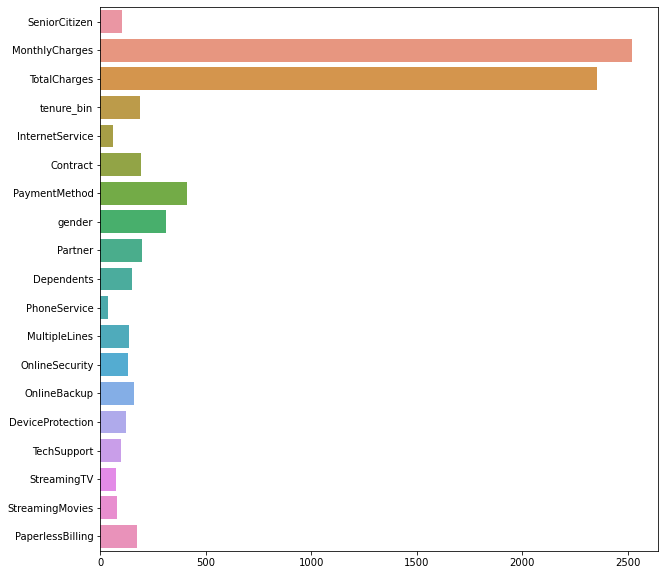

In [55]:
plt.figure(figsize=(10,10))
sns.barplot(y= final.columns,x = lgb.feature_importances_)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      5174
           1       0.73      1.00      0.84      1869

    accuracy                           0.90      7043
   macro avg       0.87      0.93      0.89      7043
weighted avg       0.93      0.90      0.91      7043

Precision Score: 73.15%
Recall Score: 99.84%
F1 score: 84.43%


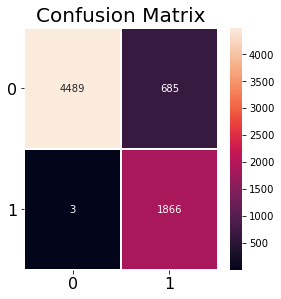

In [56]:
LG = LGBMClassifier(class_weight={0:0.21,1:0.79},learning_rate=0.13099999999999,max_depth=18,n_estimators=250)
LG.fit(final, target)
prd = LG.predict(final)
print(classification_report(target,prd))
metrics(target,prd)
plot_confusion(target,prd)